In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('DATA/train_sample10mill.csv')

In [3]:
#pd.set_option('display.max_rows', None)

df.head(10000).sort_values(by='attributed_time', ascending=False)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
5819,311533,5,1,7,113,2017-11-09 14:17:39,2017-11-09 14:17:57,1
5263,329663,29,1,1,213,2017-11-09 13:59:08,2017-11-09 14:09:50,1
4876,336812,84,0,866,101,2017-11-09 03:53:56,2017-11-09 12:35:01,1
9893,291810,10,1,8,113,2017-11-09 09:58:25,2017-11-09 09:58:58,1
5842,306298,45,1,47,419,2017-11-09 09:48:13,2017-11-09 09:48:22,1
...,...,...,...,...,...,...,...,...
9995,183942,13,1,13,477,2017-11-07 03:52:51,NaN,0
9996,58028,12,1,13,178,2017-11-07 04:53:28,NaN,0
9997,219163,3,1,9,130,2017-11-09 11:19:57,NaN,0
9998,95509,9,1,28,232,2017-11-06 16:21:54,NaN,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               int64 
 1   app              int64 
 2   device           int64 
 3   os               int64 
 4   channel          int64 
 5   click_time       object
 6   attributed_time  object
 7   is_attributed    int64 
dtypes: int64(6), object(2)
memory usage: 610.4+ MB


In [5]:
# df['ip']=df['ip'].astype('category')
# df['app']=df['app'].astype('category')
# df['device']=df['device'].astype('category')
# df['channel']=df['channel'].astype('category')
# df['os']=df['os'].astype('category')

In [6]:
#df.info()

In [7]:
#df = df.drop('attributed_time', axis=1)

In [8]:
df.describe()

,ip,app,device,os,channel,is_attributed
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,9.086921e+04,1.201197e+01,2.178740e+01,2.268313e+01,2.685796e+02,2.480200e-03
std,6.953198e+04,1.482777e+01,2.597843e+02,5.526972e+01,1.295711e+02,4.973981e-02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4.021600e+04,3.000000e+00,1.000000e+00,1.300000e+01,1.400000e+02,0.000000e+00
50%,7.960700e+04,1.200000e+01,1.000000e+00,1.800000e+01,2.580000e+02,0.000000e+00
75%,1.182500e+05,1.500000e+01,1.000000e+00,1.900000e+01,3.790000e+02,0.000000e+00
max,3.647780e+05,7.430000e+02,4.222000e+03,9.220000e+02,4.980000e+02,1.000000e+00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 8 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   ip               int64 
 1   app              int64 
 2   device           int64 
 3   os               int64 
 4   channel          int64 
 5   click_time       object
 6   attributed_time  object
 7   is_attributed    int64 
dtypes: int64(6), object(2)
memory usage: 610.4+ MB


In [10]:
#df.hist(grid=False)

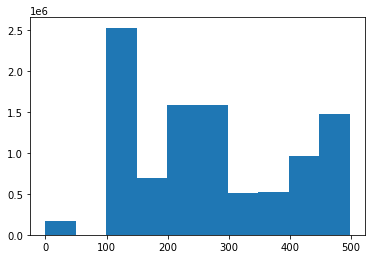

In [11]:
df['channel'].hist(grid=False)

In [12]:
# a count of clicks resulting in downloads vs clicks with no downloads. 
df['is_attributed'].value_counts()

0    9975198
1      24802
Name: is_attributed, dtype: int64

In [13]:
# % of clicks that result in a download
24802/9975198

0.0024863666866562447

In [14]:
#not-downloaded(fraudulent click) vs downloaded(not fraudulent)
dl = df['is_attributed'].value_counts()

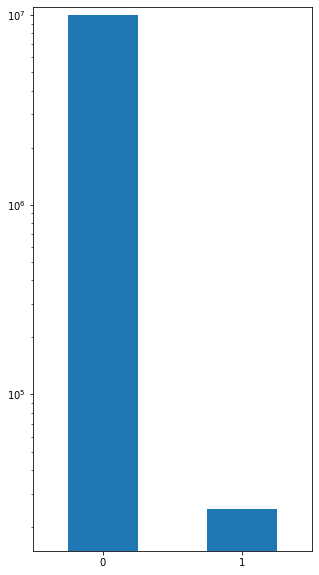

In [15]:
dl.plot.bar(logy=True,ylim=[15000,11000000], rot=0, figsize=(5,10))

In [16]:
dl

0    9975198
1      24802
Name: is_attributed, dtype: int64

In [17]:
#df.groupby('Outlet_Location_Type').get_group('Tier 1')
#df['Item_Outlet_Sales'] = df.groupby('Item_Type')["Item_Outlet_Sales"].transform(lambda x: x.sum()).round(2)
grouped = df.groupby('channel')

In [133]:
grouped = grouped.count()

In [138]:
grouped['fraud_click'] = grouped['is_attributed']-grouped['attributed_time']

In [139]:
grouped.sort_values(by='fraud_click', ascending=False)

,ip,app,device,os,click_time,attributed_time,is_attributed,fruad_click,fraud_click
channel,,,,,,,,,
280,816253,816253,816253,816253,816253,223,816253,816030,816030
245,479417,479417,479417,479417,479417,47,479417,479370,479370
107,456954,456954,456954,456954,456954,237,456954,456717,456717
477,388360,388360,388360,388360,388360,56,388360,388304,388304
134,320014,320014,320014,320014,320014,197,320014,319817,319817
...,...,...,...,...,...,...,...,...,...
256,1,1,1,1,1,0,1,1,1
238,1,1,1,1,1,0,1,1,1
169,1,1,1,1,1,0,1,1,1


In [19]:
#grouped.groups

In [20]:
# x will show the channels with more than 150,000 rows (members)
grouped.filter(lambda x: len(x)>150000)

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,195365,12,1,17,259,2017-11-07 11:03:09,NaN,0
1,59081,3,1,13,280,2017-11-08 10:18:43,NaN,0
5,1082,18,1,16,107,2017-11-08 14:02:05,NaN,0
6,18942,3,1,18,280,2017-11-09 02:26:35,NaN,0
7,72771,12,1,13,245,2017-11-07 13:33:39,NaN,0
...,...,...,...,...,...,...,...,...
9999987,38653,3,1,10,280,2017-11-08 01:24:45,NaN,0
9999990,44905,18,1,19,134,2017-11-08 10:56:18,NaN,0
9999991,89130,3,1,25,205,2017-11-08 06:25:10,NaN,0
9999993,18486,3,1,13,205,2017-11-09 12:25:32,NaN,0


In [21]:
no_download = df['is_attributed'] == 0

In [22]:
no_download

0          True
1          True
2          True
3          True
4          True
           ... 
9999995    True
9999996    True
9999997    True
9999998    True
9999999    True
Name: is_attributed, Length: 10000000, dtype: bool

In [23]:
#df.groupby('channel')[['no_download']].count().describe()

In [24]:
chn_dev = df.groupby(['channel', 'device']).count()

In [25]:
chn_dev.sort_values(by='is_attributed', ascending=False)

ip     app      os  click_time  attributed_time  \
channel device                                                        
280     1       787733  787733  787733      787733              218   
245     1       455268  455268  455268      455268               47   
107     1       417096  417096  417096      417096              236   
477     1       381092  381092  381092      381092               56   
134     1       306153  306153  306153      306153              196   
...                ...     ...     ...         ...              ...   
320     242          1       1       1           1                0   
213     1145         1       1       1           1                0   
        1150         1       1       1           1                0   
        1163         1       1       1           1                0   
498     3543         1       1       1           1                0   

                is_attributed  
channel device                 
280     1              787733  
245     1              455268  
107     1              417096  
477     1              381092  
134     1              306153  
...                       ...  
320     242                 1  
213     1145                1  
        1150                1  
        1163                1  
498     3543                1  

[3159 rows x 6 columns]

In [26]:
chn_dev.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3159 entries, (0, 0) to (498, 3543)
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ip               3159 non-null   int64
 1   app              3159 non-null   int64
 2   os               3159 non-null   int64
 3   click_time       3159 non-null   int64
 4   attributed_time  3159 non-null   int64
 5   is_attributed    3159 non-null   int64
dtypes: int64(6)
memory usage: 172.0 KB


In [27]:
#test.reset_index(level='channel')

In [28]:
# which app has the most downloads?
dl_app = df.groupby('app')

In [29]:
#dl_app.agg('count').sort_values(by='is_attributed', ascending=False)

In [30]:
# df2 = pd.read_csv('DATA/train_sample10mill.csv')
# df2.set_index(['app', 'is_attributed']).count(level="app").sort_values(by='is_attributed', ascending=False)

In [141]:
ip_dev = df.groupby(['ip', 'device'])

In [142]:
ip_dev = ip_dev.count().sort_values(by='is_attributed', ascending=False)

In [83]:
#ips = df.groupby('ip')

In [143]:
ip_dev['fraud_click'] =  ip_dev['is_attributed']-ip_dev['attributed_time']

In [145]:
ip_dev

app     os  channel  click_time  attributed_time  \
ip     device                                                       
5348   1       57666  57666    57666       57666               59   
5314   1       55050  55050    55050       55050               50   
73516  1       34595  34595    34595       34595               63   
73487  1       34113  34113    34113       34113               50   
53454  1       23652  23652    23652       23652                2   
...              ...    ...      ...         ...              ...   
239585 1           1      1        1           1                0   
119604 0           1      1        1           1                0   
       3032        1      1        1           1                0   
239578 1           1      1        1           1                0   
1      1           1      1        1           1                1   

               is_attributed  fraud_click  
ip     device                              
5348   1               57666        57607  
5314   1               55050        55000  
73516  1               34595        34532  
73487  1               34113        34063  
53454  1               23652        23650  
...                      ...          ...  
239585 1                   1            1  
119604 0                   1            1  
       3032                1            1  
239578 1                   1            1  
1      1                   1            0  

[233259 rows x 7 columns]

In [33]:
# successes do after grouping
#df['atrributed_time']/df['is_attributed']

In [34]:
#failures -clicks that did not result in a download
#1-(df['atrributed_time']/df['is_attributed'])

In [35]:
# def gh(column,):
    

In [146]:
ip_group = df.groupby('ip').count()

In [147]:
ip_group

,app,device,os,channel,click_time,attributed_time,is_attributed
ip,,,,,,,
1,1,1,1,1,1,1,1
5,1,1,1,1,1,0,1
6,72,72,72,72,72,0,72
9,239,239,239,239,239,0,239
10,76,76,76,76,76,0,76
...,...,...,...,...,...,...,...
364765,1,1,1,1,1,0,1
364774,1,1,1,1,1,0,1
364775,1,1,1,1,1,0,1


In [38]:
ip_group.sort_values(by='is_attributed', ascending=False)

,app,device,os,channel,click_time,attributed_time,is_attributed
ip,,,,,,,
5348,66847,66847,66847,66847,66847,116,66847
5314,63764,63764,63764,63764,63764,117,63764
73516,41761,41761,41761,41761,41761,71,41761
73487,41176,41176,41176,41176,41176,59,41176
53454,27115,27115,27115,27115,27115,7,27115
...,...,...,...,...,...,...,...
187431,1,1,1,1,1,1,1
285290,1,1,1,1,1,0,1
285291,1,1,1,1,1,0,1


In [148]:
ip_group['fraud_click'] = ip_group['is_attributed']-ip_group['attributed_time']

In [151]:
ip_group.sort_values(by='fraud_click', ascending=False).head(100)

,app,device,os,channel,click_time,attributed_time,is_attributed,fraud_click
ip,,,,,,,,
5348,66847,66847,66847,66847,66847,116,66847,66731
5314,63764,63764,63764,63764,63764,117,63764,63647
73516,41761,41761,41761,41761,41761,71,41761,41690
73487,41176,41176,41176,41176,41176,59,41176,41117
53454,27115,27115,27115,27115,27115,7,27115,27108
...,...,...,...,...,...,...,...,...
59125,3877,3877,3877,3877,3877,0,3877,3877
5729,3823,3823,3823,3823,3823,2,3823,3821
118315,3762,3762,3762,3762,3762,3,3762,3759


In [39]:
#ip_group['success_rate'] = ip_group['attributed_time']/ip_group['is_attributed']
#ip_group['failures'] = 1 - (ip_group['attributed_time']/ip_group['is_attributed'])

In [77]:
ip_group

,app,device,os,channel,click_time,attributed_time,is_attributed,success_rate
ip,,,,,,,,
1,1,1,1,1,1,1,1,1.0
5,1,1,1,1,1,0,1,0.0
6,72,72,72,72,72,0,72,0.0
9,239,239,239,239,239,0,239,0.0
10,76,76,76,76,76,0,76,0.0
...,...,...,...,...,...,...,...,...
364765,1,1,1,1,1,0,1,0.0
364774,1,1,1,1,1,0,1,0.0
364775,1,1,1,1,1,0,1,0.0


In [41]:
# #ax = sns.barplot(x = 'Month_ID', y = 'Revenue', hue = 'Promo', data = dataframe, palette = ["red", "green", "blue"], ci = False)

# ax = sns.barplot(x = 'ip', y = 'channel', hue = 'is_attributed', data = device_group, palette = ["red", "green", "blue"], ci = False)

# # "Error bars" signify confidence interval can be removed with ci = False

In [42]:
#device_group[ip_mult].plot()

In [43]:
#sns.distplot(ip_single, bins=2, color='k')

In [44]:
#device_group['ip'].plot.density()

In [45]:
#x = device_group['attributed_time'].values

In [46]:
#sns.distplot(x)

In [47]:
#df.groupby('domain')['ID'].nunique()
#df = df.groupby(by='domain', as_index=False).agg({'ID': pd.Series.nunique})

In [48]:
#chan_downloads = df['channel'][x]

In [49]:
#chan_downloads

In [76]:
# channel with the most downloads
#chan_downloads.sort_values(ascending=False)

In [ ]:
#channel with the least downloads
#chan_downloads.sort_values(ascending=True)

In [ ]:
#chan_downloads.hist(grid=False)

In [ ]:
#grouped by channel and counted
#channel_group = df.groupby('channel').count()

In [ ]:
#channel_group

In [ ]:
# the average number of ip addresses per channel
# x = channel_group['ip'].values

# # Calculating the mean
# mean = channel_group['ip'].mean()

# sns.distplot(x, color='blue')

# # plotting the mean

# plt.axvline(mean,0, 1, color = 'red')

In [51]:
device_group = df.groupby('device').count()

In [52]:
device_group

,ip,app,os,channel,click_time,attributed_time,is_attributed
device,,,,,,,
0,56011,56011,56011,56011,56011,5549,56011
1,9428426,9428426,9428426,9428426,9428426,16610,9428426
2,437699,437699,437699,437699,437699,115,437699
4,91,91,91,91,91,17,91
5,740,740,740,740,740,0,740
...,...,...,...,...,...,...,...
4196,1,1,1,1,1,0,1
4199,1,1,1,1,1,0,1
4208,1,1,1,1,1,0,1


In [99]:
device_group['fraud_clicks'] = device_group['is_attributed']-device_group['attributed_time']

In [100]:
device_group

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
0,56011,56011,56011,56011,56011,5549,56011,50462
1,9428426,9428426,9428426,9428426,9428426,16610,9428426,9411816
2,437699,437699,437699,437699,437699,115,437699,437584
4,91,91,91,91,91,17,91,74
5,740,740,740,740,740,0,740,740
...,...,...,...,...,...,...,...,...
4196,1,1,1,1,1,0,1,1
4199,1,1,1,1,1,0,1,1
4208,1,1,1,1,1,0,1,1


In [ ]:
#device_group.to_csv(r'/Users/galvanize/Documents/capstone3/device_group.csv')

In [101]:
device_group.sort_values(by='is_attributed', ascending=False)

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
1,9428426,9428426,9428426,9428426,9428426,16610,9428426,9411816
2,437699,437699,437699,437699,437699,115,437699,437584
0,56011,56011,56011,56011,56011,5549,56011,50462
3032,37462,37462,37462,37462,37462,1,37462,37461
3543,14512,14512,14512,14512,14512,0,14512,14512
...,...,...,...,...,...,...,...,...
1300,1,1,1,1,1,0,1,1
1307,1,1,1,1,1,0,1,1
1309,1,1,1,1,1,1,1,0


In [102]:
ip_single = device_group['ip']==1
ip_mult = device_group['ip']>1

In [103]:
df_dev_singleIP = device_group[ip_single]

In [104]:
df_dev_singleIP

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
13,1,1,1,1,1,0,1,1
47,1,1,1,1,1,0,1,1
90,1,1,1,1,1,0,1,1
93,1,1,1,1,1,0,1,1
139,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
4196,1,1,1,1,1,0,1,1
4199,1,1,1,1,1,0,1,1
4208,1,1,1,1,1,0,1,1


In [114]:
df_dev_multiIP = device_group[ip_mult]

In [115]:
df_dev_multiIP

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
0,56011,56011,56011,56011,56011,5549,56011,50462
1,9428426,9428426,9428426,9428426,9428426,16610,9428426,9411816
2,437699,437699,437699,437699,437699,115,437699,437584
4,91,91,91,91,91,17,91,74
5,740,740,740,740,740,0,740,740
...,...,...,...,...,...,...,...,...
3866,9712,9712,9712,9712,9712,0,9712,9712
3867,81,81,81,81,81,14,81,67
3940,2,2,2,2,2,0,2,2


In [122]:
df_dev_multiIP.sort_values(by='fraud_clicks', ascending=True)

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
133,3,3,3,3,3,3,3,0
1148,3,3,3,3,3,3,3,0
715,2,2,2,2,2,2,2,0
672,2,2,2,2,2,2,2,0
669,2,2,2,2,2,2,2,0
...,...,...,...,...,...,...,...,...
3543,14512,14512,14512,14512,14512,0,14512,14512
3032,37462,37462,37462,37462,37462,1,37462,37461
0,56011,56011,56011,56011,56011,5549,56011,50462


In [105]:
# 'attributed_time' mean of devices with a single ip address
sipm = df_dev_singleIP['attributed_time'].mean()

In [106]:
sipm

0.14568345323741008

In [107]:
# 'attributed_time' mean of devices with multiple ip addresses
mipm = df_dev_multiIP['attributed_time'].mean()

In [108]:
mipm

33.957417582417584

"Hypothesis tests determine whether your sample data provide sufficient evidence to reject the null hypothesis for the entire population. To perform this test, the procedure compares your sample statistic to the null value and determines whether it is sufficiently rare. “Sufficiently rare” is defined in a hypothesis test by:

Assuming that the null hypothesis is true—the graphs center on the null value.
The significance (alpha) level—how far out from the null value is the critical region?
The sample statistic—is it within the critical region?" Statistics By Jim

Assuming an alpha = .05 
Null Hypothesis: Devices associated with multiple IP addresses have the same mean number of 'attributed_time' recordings (clicks that result in a download so are considered valid) as devices associates with a single IP address.

Alternate Hypothesis: The mean number of 'attributed_time' recordings is different between Devices associated with multiple IP addresses and devices associated with a single IP address

In [64]:
from scipy import stats

In [109]:
stats.ttest_ind(df_dev_singleIP['attributed_time'], df_dev_multiIP['attributed_time'], equal_var=False)

Ttest_indResult(statistic=-1.4062736782224992, pvalue=0.1600701486302481)

We fail to reject the Null Hypothesis since our P-Value of .16 is larger than our cutoff threshold of .05 and falls outside of our 'rejection area'

In [125]:
# Looking for clicks that did not result in a download (suspected fraudulent click) for devices with a single IP address
mask_single = df_dev_singleIP['fraud_clicks']>0

In [128]:
df_dev_singleIP['fraud_clicks'].value_counts()

1    475
0     81
Name: fraud_clicks, dtype: int64

In [126]:
df_dev_singleIP[mask_single]

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
13,1,1,1,1,1,0,1,1
47,1,1,1,1,1,0,1,1
90,1,1,1,1,1,0,1,1
93,1,1,1,1,1,0,1,1
139,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...
4196,1,1,1,1,1,0,1,1
4199,1,1,1,1,1,0,1,1
4208,1,1,1,1,1,0,1,1


In [68]:
mask_single.value_counts()

True     475
False     81
Name: attributed_time, dtype: int64

In [69]:
# Is this correct? The mean value of 'fraudulent clicks' for devices with a single IP address?
mask_single.mean()

0.85431654676259

In [70]:
(df_dev_singleIP['attributed_time']==0).mean()

0.85431654676259

In [112]:
mask_multi.value_counts()

False    421
True     307
Name: attributed_time, dtype: int64

In [113]:
# Looking for clicks that did not result in a download (suspected fraudulent click) for devices with a multiple IP addresses
mask_multi = df_dev_multiIP['attributed_time']==0

In [72]:
mask_multi.mean()

0.4217032967032967

In [74]:
# Is this correct? The mean value of 'fraudulent clicks' for devices with a multiple IP addresses?
(df_dev_multiIP['attributed_time']==0).mean()

0.4217032967032967

In [88]:
(df_dev_multiIP['attributed_time']==0).std()

0.49417109666735254

Assuming an alpha = .05 

Null Hypothesis: Devices associated with multiple IP addresses have the same mean number (can I say 'rate' of fraudulent clicks?) of fraudulent clicks (clicks that did not result in a download, i.e. 'attributed_time' = 0) as devices associates with a single IP address.

Alternate Hypothesis: The number of fraudulent downloads is not the same for devices with multiple IP addresses and for devices with single associated IP address

In [75]:
stats.ttest_ind(df_dev_singleIP['attributed_time']==0, df_dev_multiIP['attributed_time']==0, equal_var=False)

Ttest_indResult(statistic=18.286171431626467, pvalue=1.5757044227158737e-66)

The small P-Value of 1.5757044227158737e-66 means we can reject the Null Hypothesis and have a 95% confidence level that there is a statistically significant difference between the number of fraudulent downloads between devices associated with multiple IP addresses and devices associated with only a single IP address.

In [96]:
df_dev_singleIP[df_dev_singleIP['attributed_time']==0]['attributed_time'].value_counts()

0    475
Name: attributed_time, dtype: int64

In [117]:
(df_dev_multiIP['fraud_clicks']).std()

349181.2971513048

In [131]:
(df_dev_multiIP['fraud_clicks']).mean()

13701.542582417582

In [130]:
(df_dev_singleIP['fraud_clicks']).mean()

0.85431654676259

In [189]:
test = df_dev_multiIP[['fraud_clicks']]

In [190]:
test

,fraud_clicks
device,
0,50462
1,9411816
2,437584
4,74
5,740
...,...
3866,9712
3867,67
3940,2


In [191]:
test.to_csv(r'/Users/galvanize/Documents/capstone3/dev_multiIP_fc.csv')

Assuming an alpha = .05 

Null Hypothesis: Devices associated with multiple IP addresses have the same mean number of fraudulent clicks (clicks that did not result in a download, i.e. 'attributed_time' = 0) as devices associates with a single IP address.

Alternate Hypothesis: The mean number of fraudulent downloads is different between devices with multiple IP addresses and devices with single associated IP address

In [129]:
stats.ttest_ind(df_dev_singleIP['fraud_clicks'], df_dev_multiIP['fraud_clicks'], equal_var=False)

Ttest_indResult(statistic=-1.0586614537393273, pvalue=0.2901056054220504)

The pvalue of  0.2901056054220504 falls outside of the area of rejection of .05. There is not enough evidence to reject the Null Hypothesis

In [181]:
ip_grp = df.groupby(['ip']).count()

In [182]:
ip_grp

,app,device,os,channel,click_time,attributed_time,is_attributed
ip,,,,,,,
1,1,1,1,1,1,1,1
5,1,1,1,1,1,0,1
6,72,72,72,72,72,0,72
9,239,239,239,239,239,0,239
10,76,76,76,76,76,0,76
...,...,...,...,...,...,...,...
364765,1,1,1,1,1,0,1
364774,1,1,1,1,1,0,1
364775,1,1,1,1,1,0,1


In [179]:
#app_group

In [ ]:
#df.groupby('Outlet_Location_Type')[['Item_Weight','Item_Outlet_Sales']].sum().round(2)

In [193]:
top_fraud = df_dev_multiIP.sort_values(by='fraud_clicks', ascending=False)

In [194]:
top_fraud

,ip,app,os,channel,click_time,attributed_time,is_attributed,fraud_clicks
device,,,,,,,,
1,9428426,9428426,9428426,9428426,9428426,16610,9428426,9411816
2,437699,437699,437699,437699,437699,115,437699,437584
0,56011,56011,56011,56011,56011,5549,56011,50462
3032,37462,37462,37462,37462,37462,1,37462,37461
3543,14512,14512,14512,14512,14512,0,14512,14512
...,...,...,...,...,...,...,...,...
952,2,2,2,2,2,2,2,0
133,3,3,3,3,3,3,3,0
1148,3,3,3,3,3,3,3,0
